In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'/soft/datascience/Balsam/0.3.5.1/env/lib/python3.6/site-packages/')
sys.path.insert(0,'/gpfs/mira-home/keceli/ffn/keceli_ffn/')
sys.path.insert(0,'/soft/datascience/tensorflow/tf1.13/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
missing_modules = """
  Uncomment the lines in the next cell and execute them to install a new conda environment 
  and a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top.
  
  """
try:
    import tensorflow as tf
except:
    print('Tensorflow is not installed:', missing_modules)
try:
    import pandas as pd
except:
    print('Pandas is not installed:', missing_modules)
try:
    import matplotlib
except:
    print('Matplotlib is not installed:', missing_modules)

Tensorflow is not installed: 
  Uncomment the lines in the next cell and execute them to install a new conda environment 
  and a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top.
  
  
Pandas is not installed: 
  Uncomment the lines in the next cell and execute them to install a new conda environment 
  and a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top.
  
  
Matplotlib is not installed: 
  Uncomment the lines in the next cell and execute them to install a new conda environment 
  and a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top.
  
  


In [14]:
import tensorflow

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
Here is how to proceed:
- If you're working with a numpy git repository, try `git clean -xdf`
  (removes all files not under version control) and rebuild numpy.
- If you are simply trying to use the numpy version that you have installed:
  your installation is broken - please reinstall numpy.
- If you have already reinstalled and that did not fix the problem, then:
  1. Check that you are using the Python you expect (you're using /opt/anaconda3/bin/python),
     and that you have no directories in your PATH or PYTHONPATH that can
     interfere with the Python and numpy versions you're trying to use.
  2. If (1) looks fine, you can open a new issue at
     https://github.com/numpy/numpy/issues.  Please include details on:
     - how you installed Python
     - how you installed numpy
     - your operating system
     - whether or not you have multiple versions of Python installed
     - if you built from source, your compiler versions and ideally a build log

     Note: this error has many possible causes, so please don't comment on
     an existing issue about this - open a new one instead.

Original error was: No module named 'numpy.core._multiarray_umath'


In [ ]:
## Step 1
## Create a new conda environment
#!conda create -y -n jhub_tensorflow

## Step 2
## After activating the environment, install the modules tou want.
## You need to install jupyter nb_conda ipykernel modules as well.
## This part can take a long time, take a coffee break
#!source activate jhub_tensorflow; conda install -y jupyter nb_conda ipykernel tensorflow matplotlib pandas

## Step 3
## Install Jupyter kernel
#!source activate jhub_tensorflow; python -m ipykernel install --user --name jhub_tensorflow

## You can repeat Step 2, whenever you need to install a new module to the same kernel.
##!source activate jhub_tensorflow; conda install -y newmodule
## You can omit jupyter, nb_conda, ipykernel as you have already installed.

In [3]:
# A simple test based on the Tensorflow tutorial: https://www.tensorflow.org/tutorials
# Run a single epoch for mnist, should take about 10 seconds.

import tensorflow as tf
import time
import numpy as np
import sys
import datetime
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x_train, y_train, epochs=1)
runtime = time.time() - start
loss, acc = model.evaluate(x_test, y_test)

# Record the versions, runtime and model metrics into a csv file.
record = f'{datetime.datetime.now()},{sys.version.split()[0]},{tf.__version__},{np.__version__},{loss:3f},{acc:.3f},{runtime:.3f}\n'
csvfile = '/lus/theta-fs0/projects/datascience/jupyterhub/tensorflow.csv'
with open(csvfile, 'a') as f:
        f.write(record)

# Read csv file into a Pandas dataframe and print min,max, mean and standard deviation values.
import pandas as pd
df = pd.read_csv(csvfile)
df.describe()

10000/10000 [==============================] - 1s 89us/sample - loss: 0.2319 - acc: 0.9333


,Loss,Accuracy,Time
count,6.000000,6.000000,6.000000
mean,0.226439,0.934167,8.985000
std,0.005648,0.001602,0.975859
min,0.215710,0.933000,7.371000
25%,0.226165,0.933000,8.590250
50%,0.227933,0.933500,9.190500
75%,0.229208,0.934750,9.533500
max,0.231852,0.937000,10.120000


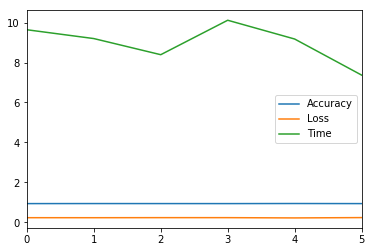

In [4]:
# A simple plot of accuracy, loss, and runtime.
%matplotlib inline
df.Accuracy.plot(label='Accuracy')
df.Loss.plot()
ax = df.Time.plot()
ax.legend()

In [5]:
df

,Date,Python_version,Tensorflow_version,Numpy_version,Loss,Accuracy,Time
0,2019-07-05 21:50:54.707166,3.6.8,1.13.1,1.16.2,0.226852,0.933,9.644
1,2019-07-05 21:51:39.828420,3.6.8,1.13.1,1.16.2,0.225936,0.935,9.202
2,2019-07-05 22:03:57.582148,3.6.8,1.13.1,1.16.2,0.229273,0.934,8.394
3,2019-07-05 22:07:14.543136,3.6.8,1.13.1,1.16.2,0.229013,0.933,10.120
4,2019-07-05 22:27:40.154685,3.6.8,1.13.1,1.16.2,0.215710,0.937,9.179
5,2019-07-14 18:21:11.680041,3.6.8,1.13.1,1.16.2,0.231852,0.933,7.371
